In [134]:
import numpy as np
import pandas as pd
from datetime import datetime
from __future__ import division

In [42]:
gold = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/7_2_1_tn_whole_descriptor_removed.tsv")

In [62]:
gold.head()

,drug_id,disease_id,association,C0008301,C0011603,C0015230,C0016382,C0018681,C0018965,C0020517,...,387585,388165,55219,55973,65264,80350,84624,84722,91851,406216
0,DB00190,102300,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,DB00190,125320,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,DB00190,168100,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,DB00190,168600,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,DB00193,102300,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_pos = gold[gold.association == 1]
df_neg = gold[gold.association == 0]

In [69]:
features = gold.columns.values[3:].tolist()
pos = df_pos[features]
neg = df_neg[features]

In [70]:
pos_feature_sum = pos.sum(axis=0)
neg_feature_sum = neg.sum(axis=0)

In [71]:
df_pos_sum = pd.DataFrame({'feature' : pos_feature_sum.index.values, 'sum' : pos_feature_sum.values})
df_neg_sum = pd.DataFrame({'feature' : neg_feature_sum.index.values, 'sum' : neg_feature_sum.values})

In [72]:
len(neg)

14282

In [73]:
#### Labplace Smoothing
numP = 1434 # len(pos)
numN = 9293 #len(neg) 
LapP = (numP +1) / (numP + numN + 2)
LapN = (numN +1 ) / (numP + numN + 2)

In [74]:
# P(Feature | Positive), P(Feature | Negative)
LapF_P = (df_pos_sum['sum'] + 1) / (numP + 2)
LapF_N = (df_neg_sum['sum'] + 1) / (numN + 2)

In [75]:
# P(Positive | Featue), P(Negative | Feature) : positive일 경우  (LapF_P * LapP) / (LapF_P * LapP + LapF_N + LapN)
LapP_F = (LapF_P * LapP) / (LapF_P * LapP + LapF_N * LapN)
LapN_F = (LapF_N * LapN) / (LapF_P * LapP + LapF_N * LapN)

In [76]:
print LapP_F.max()
print LapP_F.max()

0.996195486834
0.996195486834


In [77]:
# Log odds ratio
odds = np.log2(LapP_F) - np.log2(LapN_F)
print odds.min()
print odds.max()

-6.99708787317
8.03257320957


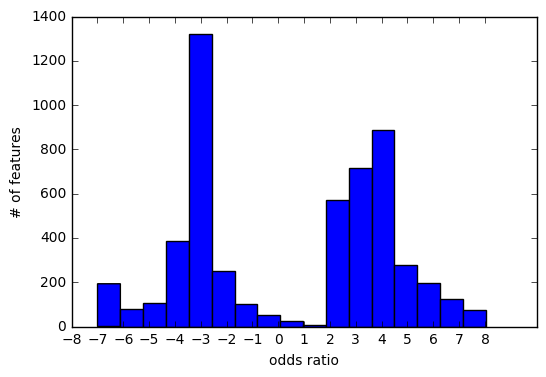

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
%matplotlib inline
num_bins = 17
plt.hist(odds, num_bins)
plt.xticks(np.arange(-8, 9, 1))
plt.xlabel("odds ratio")
plt.ylabel("# of features")

In [79]:
df_odds = pd.DataFrame({'feature' : features, 'odds' : odds})

In [80]:
df_odds.to_csv("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/7_new_association/13_odds_by_feature.tsv", sep='\t', index=False)
df_odds.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/13_odds_by_feature.tsv", sep='\t', index=False)

In [159]:
# odds ratio 구간별로 얼마나 많은 negative association을 제거하는지 확인해봄.
for i in range(8, -1, -1):
    print 'odds>{} start : '.format(i) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    filtered = df_odds[(df_odds.odds > i) & (df_odds.odds < i+1)]
    feature_ids = filtered['feature'].tolist()
    print "    len(filtered) :  {}".format(len(feature_ids))
    for j in range(len(feature_ids)):
        feature_id = feature_ids[i]
        if i ==0:
            temp = df_neg[df_neg[feature_id] == 0] # positive feature가 0인 negative association
        else:
            temp = temp[temp[feature_id] ==0 ]
    print "    len(tn) : {}".format(len(temp))
    print 'odds>{} end : '.format(i) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')

odds>8 start : 2017-03-18 01:13:22
    len(filtered) :  2
    len(tn) : 14282
odds>1 end : 2017-03-18 01:13:23
odds>7 start : 2017-03-18 01:13:23
    len(filtered) :  144
    len(tn) : 14282
odds>143 end : 2017-03-18 01:13:58
odds>6 start : 2017-03-18 01:13:58
    len(filtered) :  137
    len(tn) : 14282
odds>136 end : 2017-03-18 01:14:32
odds>5 start : 2017-03-18 01:14:32
    len(filtered) :  223
    len(tn) : 14282
odds>222 end : 2017-03-18 01:15:27
odds>4 start : 2017-03-18 01:15:27
    len(filtered) :  823
    len(tn) : 14282
odds>822 end : 2017-03-18 01:18:31
odds>3 start : 2017-03-18 01:18:31
    len(filtered) :  613
    len(tn) : 14279
odds>612 end : 2017-03-18 01:20:47
odds>2 start : 2017-03-18 01:20:47
    len(filtered) :  757
    len(tn) : 14274
odds>756 end : 2017-03-18 01:23:33
odds>1 start : 2017-03-18 01:23:33
    len(filtered) :  158
    len(tn) : 13982
odds>157 end : 2017-03-18 01:24:07
odds>0 start : 2017-03-18 01:24:07
    len(filtered) :  27
    len(tn) : 11719
odds>

In [166]:
#positive feature를 전부 고려했을 시의 negative association
filtered = df_odds[df_odds.odds > 0]
feature_ids = filtered['feature'].tolist()
print len(filtered)
for i in range(len(filtered)):
    feature_id = feature_ids[i]
    if i ==0 :
        temp = df_neg[df_neg[feature_id] == 0] # positive feature가 0인 negative association 
    else:
        temp = temp[temp[feature_id] == 0]

2884


In [168]:
len(temp)

11556